In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv(r"..\\Data\\india_data\\niftymidcap150_data.csv")
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)
df.sort_values("Date", inplace=True)
df.head(5)

,Index Name,Date,PE,PB,Div Yield,Close,Earnings
2186,NIFTY MIDCAP 150,2016-04-01,27.45,2.25,1.26,4209.39,153.35
2185,NIFTY MIDCAP 150,2016-04-04,27.56,2.26,1.25,4222.04,153.19
2184,NIFTY MIDCAP 150,2016-04-05,27.13,2.22,1.27,4156.08,153.19
2183,NIFTY MIDCAP 150,2016-04-06,27.26,2.23,1.27,4175.93,153.19
2182,NIFTY MIDCAP 150,2016-04-07,27.09,2.22,1.27,4153.55,153.32


In [4]:
df.shape

(2187, 7)

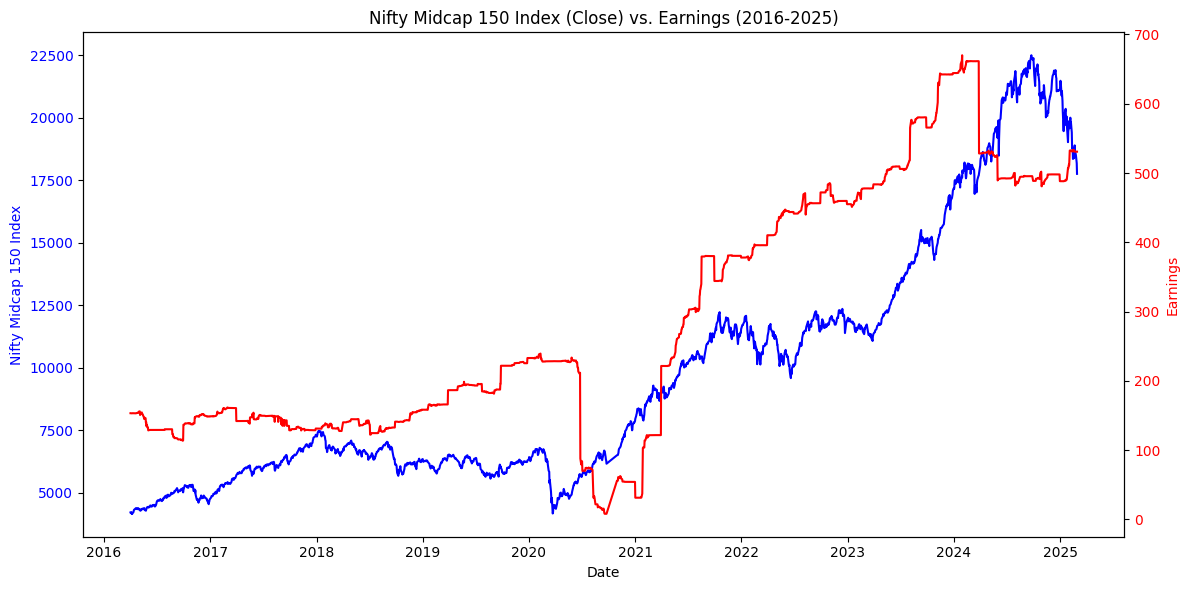

In [5]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(df["Date"], df["Close"], color="blue", label="Nifty Midcap 150 Index")
ax1.set_xlabel("Date")
ax1.set_ylabel("Nifty Midcap 150 Index", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

ax2 = ax1.twinx()
ax2.plot(df["Date"], df["Earnings"], color="red", label="Earnings")
ax2.set_ylabel("Earnings", color="red")
ax2.tick_params(axis="y", labelcolor="red")

plt.title("Nifty Midcap 150 Index (Close) vs. Earnings (2016-2025)")
fig.tight_layout()
plt.show()

In [5]:
correlation = df["Close"].corr(df["Earnings"])
print(correlation)

0.8577276331015828


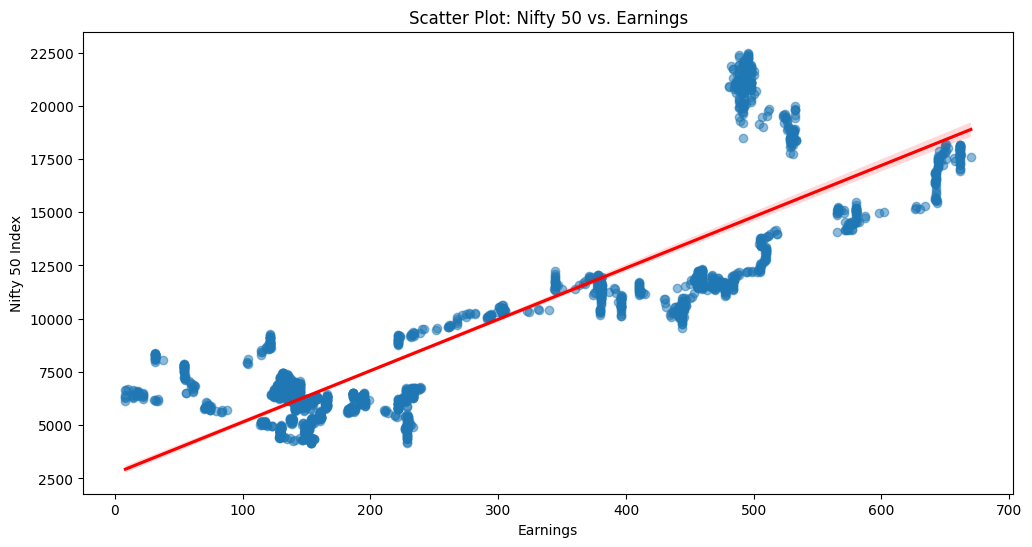

In [6]:
plt.figure(figsize=(12, 6))
sns.regplot(x=df["Earnings"], y=df["Close"], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.xlabel("Earnings")
plt.ylabel("Nifty 50 Index")
plt.title("Scatter Plot: Nifty 50 vs. Earnings")
plt.show()

Roughly linear relation b/w Nifty 50 and its earnings

In [13]:
df_datefiltered = df[df["Date"] >= pd.to_datetime("2016-04-01")]
df_datefiltered.shape

(2187, 7)

In [15]:
correlation = df_datefiltered["Close"].corr(df_datefiltered["Earnings"])
print(correlation)

0.8577276331015828


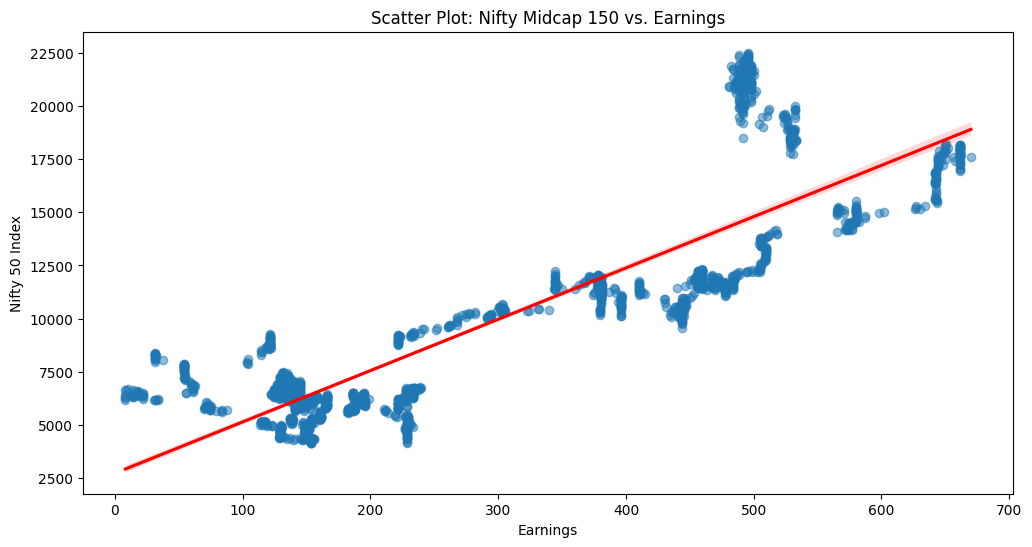

In [24]:
plt.figure(figsize=(12, 6))
sns.regplot(x=df_datefiltered["Earnings"], y=df_datefiltered["Close"], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.xlabel("Earnings")
plt.ylabel("Nifty 50 Index")
plt.title("Scatter Plot: Nifty Midcap 150 vs. Earnings")
plt.show()

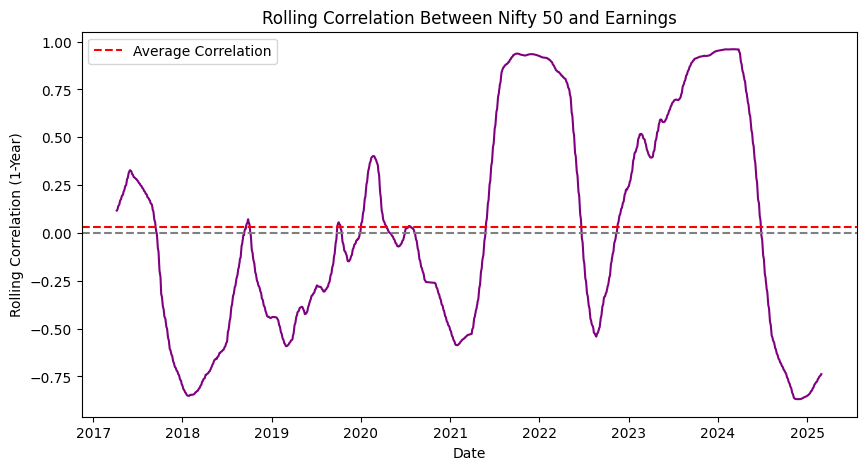

In [25]:
df_datefiltered["Rolling_Corr"] = df_datefiltered["Close"].rolling(252).corr(df_datefiltered["Earnings"])  # 252 = ~1 year

plt.figure(figsize=(10, 5))
plt.plot(df_datefiltered["Date"], df_datefiltered["Rolling_Corr"], color="purple")
plt.axhline(0, linestyle="--", color="gray")
plt.axhline(df_datefiltered["Rolling_Corr"].mean(), linestyle="--", color="red", label="Average Correlation")

plt.xlabel("Date")
plt.ylabel("Rolling Correlation (1-Year)")
plt.title("Rolling Correlation Between Nifty 50 and Earnings")
plt.legend()
plt.show()

C:\Users\sanja\AppData\Local\Temp\ipykernel_9972\1211830208.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_semi_annual = df.resample("6M", on="Date").last()


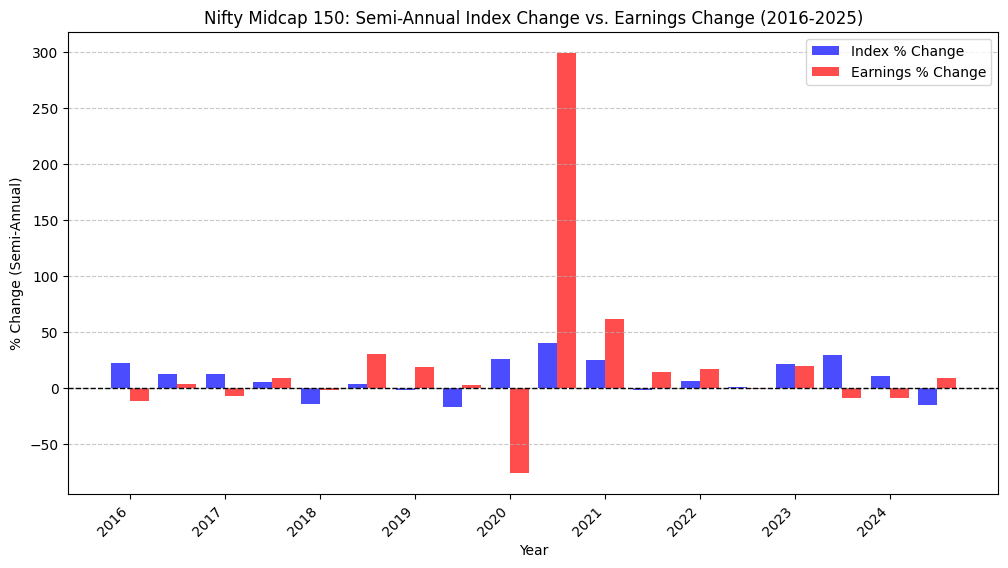

In [ ]:
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)

df_semi_annual = df.resample("6M", on="Date").last()  
df_semi_annual["Index_Change"] = df_semi_annual["Close"].pct_change() * 100
df_semi_annual["Earnings_Change"] = df_semi_annual["Earnings"].pct_change() * 100
df_semi_annual.dropna(inplace=True)

df_semi_annual["Year"] = df_semi_annual.index.year.astype(str)

years = df_semi_annual["Year"].astype(str)
index_changes = df_semi_annual["Index_Change"]
earnings_changes = df_semi_annual["Earnings_Change"]

x = np.arange(len(years))  
width = 0.4  

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - width/2, index_changes, width, label="Index % Change", color="blue", alpha=0.7)
ax.bar(x + width/2, earnings_changes, width, label="Earnings % Change", color="red", alpha=0.7)

ax.set_xlabel("Year")
ax.set_ylabel("% Change (Semi-Annual)")
ax.set_title("Nifty Midcap 150: Semi-Annual Index Change vs. Earnings Change (2016-2025)")
ax.set_xticks(x[::2])  # Show every 2nd year for better spacing
ax.set_xticklabels(years[::2], rotation=45, ha="right")
ax.axhline(0, color="black", linestyle="--", linewidth=1)  
ax.legend()
ax.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()